# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
	stratify=y,
)

# Your Work

## Data Exploration

### General

In [4]:
# Check for any null values
data.isnull().sum()

# No null values found

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

In [5]:
data.shape

(18442, 9)

In [6]:
# Show the distribution of the target variable
data["Recommended IND"].value_counts()

# Reviews are imbalanced towards recommended

Recommended IND
1    15053
0     3389
Name: count, dtype: int64

In [7]:
# Check the number of unique values in each column
for col in X.columns:
    print(f"{col}: {X[col].nunique()} unique values")

Clothing ID: 531 unique values
Age: 77 unique values
Title: 13142 unique values
Review Text: 18439 unique values
Positive Feedback Count: 79 unique values
Division Name: 2 unique values
Department Name: 6 unique values
Class Name: 14 unique values


In [8]:
# Split the data into numerical, categorical, and text columns

numerical_cols = [
	"Age",
	"Positive Feedback Count",
]

categorical_cols = [
	"Clothing ID",
	"Division Name",
	"Department Name",
	"Class Name",
]

text_cols = [
	"Title",
	"Review Text",
]

### Numerical Columns

In [9]:
# Find distribution of numerical columns
data[numerical_cols].describe()

,Age,Positive Feedback Count
count,18442.000000,18442.000000
mean,43.383635,2.697484
std,12.246264,5.942220
min,18.000000,0.000000
25%,34.000000,0.000000
50%,41.000000,1.000000
75%,52.000000,3.000000
max,99.000000,122.000000


In [10]:
# Calculate correlation values
for col in numerical_cols:
    print(f"Correlation between {col} and Recommended IND: {data[col].corr(data['Recommended IND'])}")

Correlation between Age and Recommended IND: 0.03665584890303468
Correlation between Positive Feedback Count and Recommended IND: -0.05839246155260691


### Categorical Columns

In [11]:
for col in categorical_cols:
    if data[col].nunique() < 50:
        # Only print unique values if it makes sense for visualization
        print(f"Unique values in {col}: {data[col].unique()}")
    else:
        print(f"{col} has {data[col].nunique()} unique values, too many to display")

Clothing ID has 531 unique values, too many to display
Unique values in Division Name: ['General' 'General Petite']
Unique values in Department Name: ['Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' 'Intimate']
Unique values in Class Name: ['Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Sweaters' 'Skirts'
 'Fine gauge' 'Jackets' 'Trend' 'Lounge' 'Jeans' 'Shorts' 'Casual bottoms']


In [12]:
# Get correlation between Clothing ID and Recommended IND
print(f"Correlation between Clothing ID and Recommended IND: {data['Clothing ID'].corr(data['Recommended IND'])}")

# Drop Clothing ID from analysis as it seems to be an arbitrary ID
categorical_cols.remove("Clothing ID")

Correlation between Clothing ID and Recommended IND: -0.00017988485082204582


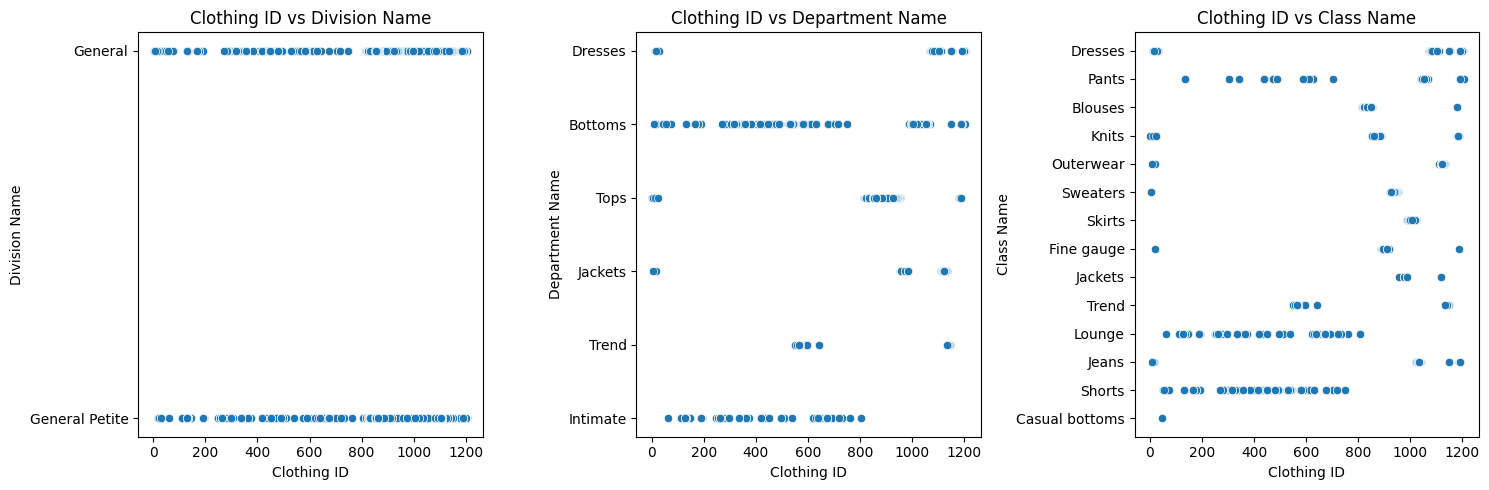

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plots of Clothing ID vs other categorical columns
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    sns.scatterplot(data=data, x="Clothing ID", y=col, ax=axes[i])
    axes[i].set_title(f"Clothing ID vs {col}")
    axes[i].set_xlabel("Clothing ID")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

/var/folders/kt/k34tfrn95y303r081ylcjp300000gr/T/ipykernel_71197/3588782227.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/kt/k34tfrn95y303r081ylcjp300000gr/T/ipykernel_71197/3588782227.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/kt/k34tfrn95y303r081ylcjp300000gr/T/ipykernel_71197/3588782227.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


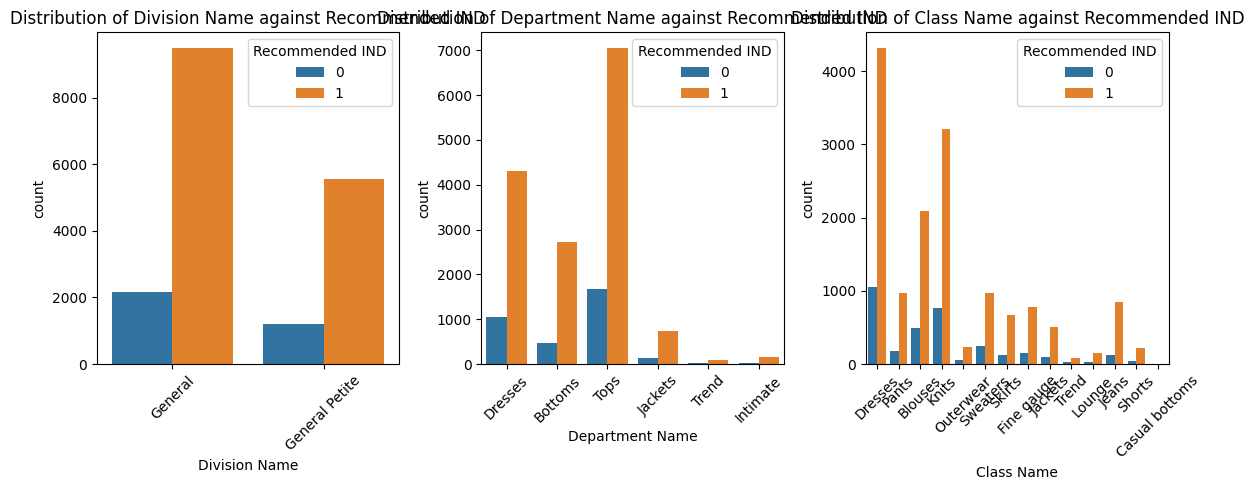

In [14]:
# Plot the distribution of categorical columns against the target variable
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    ax = axes[i] if len(categorical_cols) > 1 else axes
    sns.countplot(x=col, hue='Recommended IND', data=data, ax=ax)
    ax.set_title(f'Distribution of {col} against Recommended IND')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Findings/Outcome
- There is an imbalance within the dataset for `Recommended IND`
- Clothing ID seems to be an arbitary ID with no value
- `Division Name`, `Department Name` and `Class Name` are categorical values with fixed categories
- `Class Name` is a sub-category of `Department Name`

## Building Pipeline

In [15]:
# Download spacy model if not available
import spacy
from spacy.cli import download


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline


import os

# Disable huggingface warnings
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [16]:
# Print Numerical, Categorical, and Text columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Text columns:", text_cols)

Numerical columns: ['Age', 'Positive Feedback Count']
Categorical columns: ['Division Name', 'Department Name', 'Class Name']
Text columns: ['Title', 'Review Text']


In [17]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [18]:
cat_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ]
)
,
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class CountSpacyPosFeature(BaseEstimator, TransformerMixin):
    """Custom transformer to count POS ratio features using spaCy."""

    def __init__(self, tag: str = None):
        model_name = "en_core_web_sm"
        self.tag = tag
        spacy.prefer_gpu()
        try:
            self.nlp = spacy.load(model_name)
        except OSError:
            download(model_name)
            self.nlp = spacy.load(model_name)
        # Only keep necessary components for efficiency
        self.nlp.disable_pipes(["ner", "parser"])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        docs = self.nlp.pipe(X)
        if self.tag is None:
            # If no tag is specified, return the counts of all tokens
            pos_counts = [[len(doc)] for doc in docs]
        else:
            pos_counts = [[len([token.pos_ for token in doc if token.pos_ == self.tag])/len(doc)] for doc in docs]
        return pos_counts

class CountCharacterFeature(BaseEstimator, TransformerMixin):
    """Custom transformer to count characters in text."""

    def __init__(self, character: str = None):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.character is None:
            # If no character is specified, return the length of the text
            char_counts = [[len(text)] for text in X]
        else:
            char_counts = [[text.count(self.character)] for text in X]
        return char_counts

class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    """Custom transformer to lemmatize text using spaCy."""
    def __init__(self):
        model_name = "en_core_web_sm"
        spacy.prefer_gpu()
        try:
            self.nlp = spacy.load(model_name)
        except OSError:
            download(model_name)
            self.nlp = spacy.load(model_name)
        # Only keep necessary components for efficiency
        self.nlp.disable_pipes(["ner", "parser"])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        docs = self.nlp.pipe(X)
        lemmatized = [
            " ".join(token.lemma_ for token in doc if not token.is_stop) for doc in docs
        ]
        return lemmatized

In [20]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
import numpy as np

text_features = FeatureUnion(
    [
        (
            "count_characters",
            CountCharacterFeature(),
        ),
        (
            "count_exclamation",
            CountCharacterFeature("!"),
        ),
        (
            "count_question",
            CountCharacterFeature("?"),
        ),
        (
            "count_tokens",
            CountSpacyPosFeature(),
        ),
        (
            "count_adjectives",
            CountSpacyPosFeature("ADJ"),
        ),
        (
            "count_adverbs",
            CountSpacyPosFeature("ADV"),
        ),
    ]
)

text_pipeline = Pipeline(
    [
        (
            "reshape",
            FunctionTransformer(
                np.reshape,
                kw_args={"newshape": -1},
            ),
        ),
		("spacy_features", text_features),
    ]
)
text_pipeline

Pipeline(steps=[('reshape',
                 FunctionTransformer(func=<function reshape at 0x10de996b0>,
                                     kw_args={'newshape': -1})),
                ('spacy_features',
                 FeatureUnion(transformer_list=[('count_characters',
                                                 CountCharacterFeature()),
                                                ('count_exclamation',
                                                 CountCharacterFeature(character='!')),
                                                ('count_question',
                                                 CountCharacterFeature(character='?')),
                                                ('count_tokens',
                                                 CountSpacyPosFeature()),
                                                ('count_adjectives',
                                                 CountSpacyPosFeature(tag='ADJ')),
                                                ('count_adverbs',
                                                 CountSpacyPosFeature(tag='ADV'))]))])

In [21]:
# Flatten the output of TfidfVectorizer
tfidf_pipeline = Pipeline(
    [
        (
            "reshape",
            FunctionTransformer(
                np.reshape,
                kw_args={"newshape": -1},
            ),
        ),
        ("lemmatizer", SpacyLemmatizer()),
        ("tfidf", TfidfVectorizer(stop_words="english")),
    ]
)

tfidf_pipeline

Pipeline(steps=[('reshape',
                 FunctionTransformer(func=<function reshape at 0x10de996b0>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer', SpacyLemmatizer()),
                ('tfidf', TfidfVectorizer(stop_words='english'))])

In [22]:
combined_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, numerical_cols),
        ("cat", cat_pipeline, categorical_cols),
    ]
    +
    # Add a transformer for each text column for spacy features
    [
        (
            f"text_spacy_{col.lower().replace(' ', '_')}",
            text_pipeline,
            [col],
        )
        for col in text_cols
    ]
    +
    # Add a transformer for each text column for TF-IDF
    [
        (
            f"text_tfidf_{col.lower().replace(' ', '_')}",
            tfidf_pipeline,
			[col],
        )
        for col in text_cols
    ],
    remainder="drop",
)

combined_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Division Name', 'Department Name',
                                  'Class Name']),
                                ('text_sp...
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer()),
                                                 ('tfidf',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Title']),
                                ('text_tfidf_review_text',
                                 Pipeline(steps=[('reshape',
                                                  FunctionTransformer(func=<function reshape at 0x10de996b0>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer()),
                                                 ('tfidf',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Review Text'])])

## Training Pipeline

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

### Random Forest

In [24]:
# Build random forest pipeline
random_forest_pipeline = Pipeline(
    [
        ("preprocessor", combined_pipeline),
        (
            "classifier",
            RandomForestClassifier(class_weight="balanced", random_state=27, n_jobs=-1),
        ),
    ]
)

random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Division Name',
                                                   'Departm...
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  ['Title']),
                                                 ('text_tfidf_review_text',
                                                  Pipeline(steps=[('reshape',
                                                                   FunctionTransformer(func=<function reshape at 0x10de996b0>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  ['Review Text'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=27))])

In [25]:
# Print results
random_forest_y_pred = random_forest_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, random_forest_y_pred))
print(f"Precision:", precision_score(y_test, random_forest_y_pred))
print(f"Recall:", recall_score(y_test, random_forest_y_pred))
print(f"F1 Score:", f1_score(y_test, random_forest_y_pred))
print(f"ROC AUC Score:", roc_auc_score(y_test, random_forest_y_pred))
print(f"Precision, Recall, F1 Score:", precision_recall_fscore_support(y_test, random_forest_y_pred, average='binary'))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, random_forest_y_pred))

/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8504065040650407
Precision: 0.8518306636155606
Recall: 0.9887118193891102
F1 Score: 0.915181315304241
ROC AUC Score: 0.6123500099895404
Precision, Recall, F1 Score: (0.8518306636155606, 0.9887118193891102, 0.915181315304241, None)
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.24      0.37       339
           1       0.85      0.99      0.92      1506

    accuracy                           0.85      1845
   macro avg       0.84      0.61      0.64      1845
weighted avg       0.85      0.85      0.81      1845



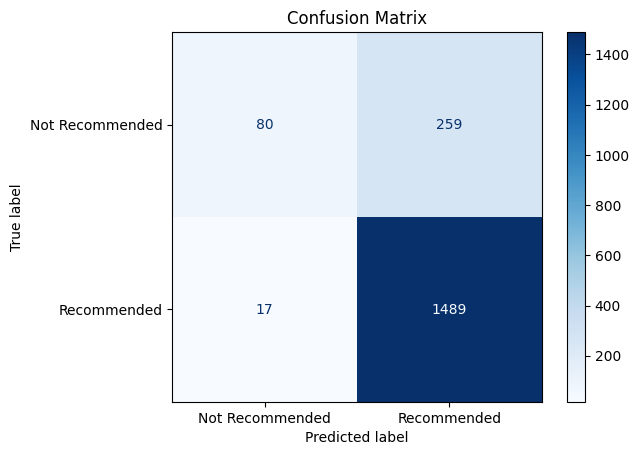

In [26]:
# Show confusion matrix
cm = confusion_matrix(y_test, random_forest_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Recommended", "Recommended"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [27]:
### Compare different classifiers

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from joblib import Parallel, delayed

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(class_weight="balanced", random_state=42),
    RandomForestClassifier(
        class_weight="balanced", random_state=42
    ),
    MLPClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
]

results = []
def train_and_evaluate(clf, X_train, y_train, X_test, y_test, combined_pipeline):
    model_name = clf.__class__.__name__
    start_time = time.time()
    pipeline = Pipeline(
        [
            ("preprocessor", combined_pipeline),
            ("classifier", clf),
        ]
    )
    pipeline.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"Training time for {model_name}: {training_time:.2f} seconds")
    start_time = time.time()

    y_pred = pipeline.predict(X_test)
    prediction_time = time.time() - start_time
    print(f"Prediction time for {model_name}: {prediction_time:.2f} seconds")

    score = f1_score(y_test, y_pred)
    print(f"{model_name} F1 Score: {score:.4f}")

    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")

    return (model_name, score, roc_auc, training_time, prediction_time)

# Run classifiers in parallel using all available cores
results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(clf, X_train, y_train, X_test, y_test, combined_pipeline) 
    for clf in classifiers
)

# Sort results by F1 score
results.sort(key=lambda x: x[2], reverse=True)
print("\n Best Classifier:")
model_name, score, roc_auc, training_time, prediction_time = results[0]
print(f"{model_name} F1 Score: {score:.4f}")

Training time for KNeighborsClassifier: 312.19 seconds
Training time for DecisionTreeClassifier: 312.29 seconds


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Training time for RandomForestClassifier: 326.29 seconds


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Training time for GradientBoostingClassifier: 327.89 seconds


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Prediction time for KNeighborsClassifier: 37.09 seconds
KNeighborsClassifier F1 Score: 0.8805
KNeighborsClassifier ROC AUC Score: 0.5097
Prediction time for DecisionTreeClassifier: 36.92 seconds
DecisionTreeClassifier F1 Score: 0.8729
DecisionTreeClassifier ROC AUC Score: 0.6851
Prediction time for RandomForestClassifier: 36.58 seconds
RandomForestClassifier F1 Score: 0.9151
RandomForestClassifier ROC AUC Score: 0.6135
Prediction time for GradientBoostingClassifier: 36.21 seconds
GradientBoostingClassifier F1 Score: 0.9179
GradientBoostingClassifier ROC AUC Score: 0.6449
Training time for MLPClassifier: 399.03 seconds


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Prediction time for MLPClassifier: 29.87 seconds
MLPClassifier F1 Score: 0.9187
MLPClassifier ROC AUC Score: 0.7781

 Best Classifier:
MLPClassifier F1 Score: 0.9187


Based on our results, we can see that the MLP Classifier has the highest out of the box f1 score. Although it takes slightly longer to train the model, the inference time is slightly shorter.

## Fine-Tuning Pipeline

In [28]:
fine_tune_pipeline = Pipeline(
    [
        ("preprocessor", combined_pipeline),
        (
            "classifier",
            MLPClassifier(random_state=42, early_stopping=True),
        ),
    ]
)

In [29]:
import pprint

# Get the parameters available for grid search

params = fine_tune_pipeline.get_params()
pprint.pprint(params)

{'classifier': MLPClassifier(early_stopping=True, random_state=42),
 'classifier__activation': 'relu',
 'classifier__alpha': 0.0001,
 'classifier__batch_size': 'auto',
 'classifier__beta_1': 0.9,
 'classifier__beta_2': 0.999,
 'classifier__early_stopping': True,
 'classifier__epsilon': 1e-08,
 'classifier__hidden_layer_sizes': (100,),
 'classifier__learning_rate': 'constant',
 'classifier__learning_rate_init': 0.001,
 'classifier__max_fun': 15000,
 'classifier__max_iter': 200,
 'classifier__momentum': 0.9,
 'classifier__n_iter_no_change': 10,
 'classifier__nesterovs_momentum': True,
 'classifier__power_t': 0.5,
 'classifier__random_state': 42,
 'classifier__shuffle': True,
 'classifier__solver': 'adam',
 'classifier__tol': 0.0001,
 'classifier__validation_fraction': 0.1,
 'classifier__verbose': False,
 'classifier__warm_start': False,
 'memory': None,
 'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),


In [30]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the parameter grid for GridSearchCV
search_spaces = {
    # Text preprocessing parameters
    "preprocessor__text_tfidf_review_text__tfidf__max_features": Integer(1000, 20000),
    "preprocessor__text_tfidf_review_text__tfidf__ngram_range": Integer(1, 3),
    # Text preprocessing parameters for Title
    "preprocessor__text_tfidf_title__tfidf__max_features": Integer(1000, 10000),
    "preprocessor__text_tfidf_title__tfidf__ngram_range": Integer(1, 2),
    # MLP classifier parameters
    "classifier__hidden_layer_sizes": Integer(10, 300),
    "classifier__alpha": Real(1e-5, 1e-1, prior="log-uniform"),
    "classifier__learning_rate": Categorical(["constant", "adaptive"]),
}

# Define the scoring metric
scoring = make_scorer(f1_score, average="weighted")

# Create a custom pipeline that handles the n-gram and hidden layer parameters correctly
class PipelineWrapper:
    def __init__(self, pipeline=None, **kwargs):
        self.pipeline = pipeline
        # Store any additional kwargs passed during initialization
        for key, value in kwargs.items():
            setattr(self, key, value)

    def set_params(self, **params):
        # If pipeline is None, we can't set params
        if self.pipeline is None:
            return self

        # Handle ngram_range parameters
        if "preprocessor__text_tfidf_review_text__tfidf__ngram_range" in params:
            ngram_val = params["preprocessor__text_tfidf_review_text__tfidf__ngram_range"]
            # If we receive an integer, convert it to a proper tuple range
            if isinstance(ngram_val, int):
                params["preprocessor__text_tfidf_review_text__tfidf__ngram_range"] = (1, ngram_val)

        if "preprocessor__text_tfidf_title__tfidf__ngram_range" in params:
            ngram_val = params["preprocessor__text_tfidf_title__tfidf__ngram_range"]
            # If we receive an integer, convert it to a proper tuple range
            if isinstance(ngram_val, int):
                params["preprocessor__text_tfidf_title__tfidf__ngram_range"] = (1, ngram_val)

        # Handle hidden_layer_sizes parameter
        if "classifier__hidden_layer_sizes" in params:
            hidden_val = params["classifier__hidden_layer_sizes"]
            # If we receive an integer, convert to a single-neuron layer tuple
            if isinstance(hidden_val, int):
                params["classifier__hidden_layer_sizes"] = (hidden_val,)

        # Set the parameters on the actual pipeline
        return self.pipeline.set_params(**params)

    def fit(self, X, y):
        return self.pipeline.fit(X, y)

    def predict(self, X):
        return self.pipeline.predict(X)

    def score(self, X, y):
        return self.pipeline.score(X, y)

    def get_params(self, deep=True):
        # This is crucial for scikit-learn's cloning operation
        params = {"pipeline": self.pipeline}
        # Add any other attributes that were set in __init__
        for key, value in self.__dict__.items():
            if key != "pipeline":
                params[key] = value
                
        # If deep=True, also include parameters from pipeline
        if deep and self.pipeline is not None:
            deep_items = self.pipeline.get_params(deep=True).items()
            params.update(("pipeline__" + k, val) for k, val in deep_items)
                
        return params


# Wrap your pipeline in the custom pipeline
custom_pipeline = PipelineWrapper(pipeline=fine_tune_pipeline)


# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=custom_pipeline,
    search_spaces=search_spaces,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring=scoring,
    random_state=42,
)

# Fit the model
bayes_search.fit(X_train, y_train)
# Get the best parameters
best_params = bayes_search.best_params_
print("Best parameters:", best_params)
# Get the best estimator
best_estimator = bayes_search.best_estimator_
print("Best estimator:", best_estimator)
# Make predictions on the test set
y_pred = best_estimator.predict(X_test)
# Calculate f1 score
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 Score:", f1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will 

Best parameters: OrderedDict([('classifier__alpha', 0.0020713650560061346), ('classifier__hidden_layer_sizes', 143), ('classifier__learning_rate', 'adaptive'), ('preprocessor__text_tfidf_review_text__tfidf__max_features', 20000), ('preprocessor__text_tfidf_review_text__tfidf__ngram_range', 1), ('preprocessor__text_tfidf_title__tfidf__max_features', 10000), ('preprocessor__text_tfidf_title__tfidf__ngram_range', 2)])
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
         

/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


F1 Score: 0.9021004634215611


In [31]:
bayes_search_y_pred = bayes_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, bayes_search_y_pred))
print(f"Precision:", precision_score(y_test, bayes_search_y_pred))
print(f"Recall:", recall_score(y_test, bayes_search_y_pred))
print(f"F1 Score:", f1_score(y_test, bayes_search_y_pred))
print(f"ROC AUC Score:", roc_auc_score(y_test, random_forest_y_pred))
print(
    f"Precision, Recall, F1 Score:",
    precision_recall_fscore_support(y_test, random_forest_y_pred, average="binary"),
)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, bayes_search_y_pred))

/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.9024390243902439
Precision: 0.9384920634920635
Recall: 0.9422310756972112
F1 Score: 0.9403578528827038
ROC AUC Score: 0.6123500099895404
Precision, Recall, F1 Score: (0.8518306636155606, 0.9887118193891102, 0.915181315304241, None)
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       339
           1       0.94      0.94      0.94      1506

    accuracy                           0.90      1845
   macro avg       0.84      0.83      0.84      1845
weighted avg       0.90      0.90      0.90      1845



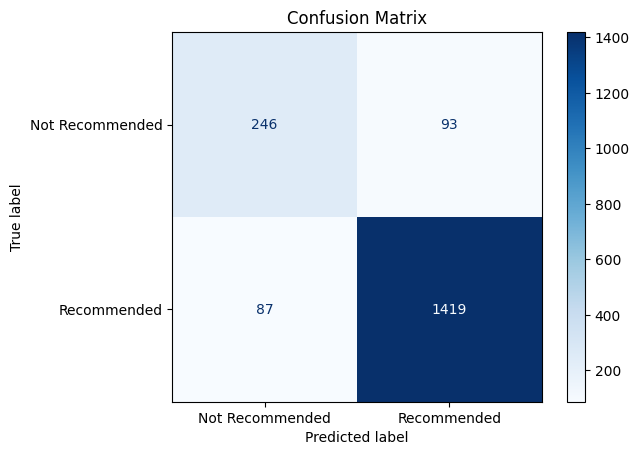

In [32]:
# Show confusion matrix
cm = confusion_matrix(y_test, bayes_search_y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Recommended", "Recommended"]
)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Compare with pre-trained HF model

In [33]:
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
import numpy as np
from datasets import Dataset
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Concatenate the Title and Review Text columns
X_train["text"] = (
    X_train["Title"].astype(str) + "\n" + X_train["Review Text"].astype(str)
)
X_test["text"] = (
    X_test["Title"].astype(str) + "\n" + X_test["Review Text"].astype(str)
)

# Further split the train dataset to get validation data
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(
    X_train,
    y_train,
    test_size=0.11111111,  # ~10% of the original data
    shuffle=True,
    random_state=27,
    stratify=y_train,
)

# Convert numpy arrays to datasets for efficient processing
train_dataset = Dataset.from_dict(
    {
        "text": X_train_new["text"].tolist(),
        "label": y_train_new.tolist(),
    }
)
val_dataset = Dataset.from_dict(
    {
        "text": X_val_new["text"].tolist(),
        "label": y_val_new.tolist(),
    }
)
test_dataset = Dataset.from_dict(
    {
        "text": X_test["text"].tolist(),
        "label": y_test.tolist(),
    }
)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(dataset):
    return tokenizer(dataset["text"], truncation=True)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val = val_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)


# Define metrics computation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions),
    }

/Users/Kelvin.K.Chan2/Documents/GitHub/dsnd-pipelines-project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 1845/1845 [00:00<00:00, 4510.63 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
from transformers import TrainingArguments, Trainer


# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

/var/folders/kt/k34tfrn95y303r081ylcjp300000gr/T/ipykernel_71197/2224527512.py:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.263000
1000,0.190600
1500,0.153100
2000,0.144900
2500,0.107100
3000,0.084800
3500,0.072800
4000,0.045800
4500,0.044700


TrainOutput(global_step=4610, training_loss=0.12188405845791037, metrics={'train_runtime': 1233.9117, 'train_samples_per_second': 59.777, 'train_steps_per_second': 3.736, 'total_flos': 2597507684577216.0, 'train_loss': 0.12188405845791037, 'epoch': 5.0})

In [35]:
# Predict on the test set
predictions = trainer.predict(tokenized_test)
preds = np.argmax(predictions.predictions, axis=-1)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, preds))
print(f"Precision:", precision_score(y_test, preds))
print(f"Recall:", recall_score(y_test, preds))
print(f"F1 Score:", f1_score(y_test, preds))
print(f"ROC AUC Score:", roc_auc_score(y_test, random_forest_y_pred))
print(
    f"Precision, Recall, F1 Score:",
    precision_recall_fscore_support(y_test, random_forest_y_pred, average="binary"),
)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, preds))

Accuracy: 0.9208672086720867
Precision: 0.9582210242587601
Recall: 0.9442231075697212
F1 Score: 0.9511705685618729
ROC AUC Score: 0.6123500099895404
Precision, Recall, F1 Score: (0.8518306636155606, 0.9887118193891102, 0.915181315304241, None)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       339
           1       0.96      0.94      0.95      1506

    accuracy                           0.92      1845
   macro avg       0.86      0.88      0.87      1845
weighted avg       0.92      0.92      0.92      1845



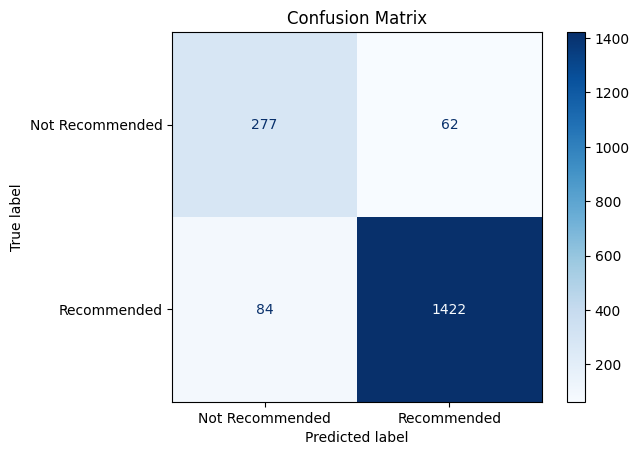

In [36]:
# Show confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Recommended", "Recommended"]
)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()